# Grating coupler FDTD simulations

You can also expand the planar component simulations to simulate an out-of-plane grating coupler.

You can run grating coupler simulations in 2D to save time, and for accuracy you can also run them in 3D

## tidy3d

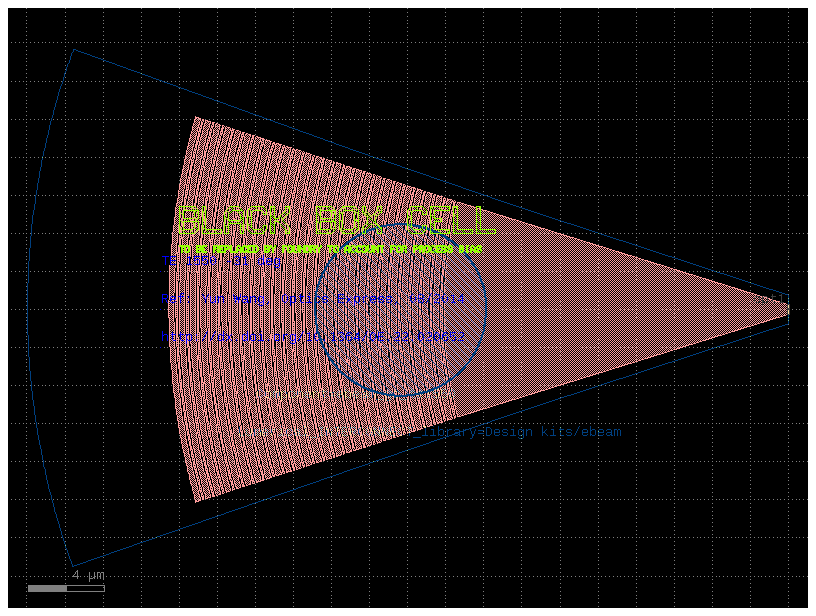

In [5]:
import gplugins.tidy3d as gt
import matplotlib.pyplot as plt
import numpy as np

from ubcpdk import PDK, cells
from ubcpdk.config import PATH

PDK.activate()

c = cells.ebeam_gc_te1550()
c.plot()

In [6]:
fiber_angle_deg = -31
s = gt.get_simulation_grating_coupler(
    c, is_3d=False, fiber_angle_deg=fiber_angle_deg, fiber_xoffset=0
)
f = gt.plot_simulation(s)

Adding layer (1, 0), zmin=0.0, zmax=0.22


AttributeError: 'DPorts' object has no attribute 'keys'

In [ ]:
def log(x):
    return 20 * np.log10(x)

In [ ]:
sp = gt.write_sparameters_grating_coupler(
    c,
    is_3d=False,
    fiber_angle_deg=fiber_angle_deg,
    fiber_xoffset=0,
    filepath=PATH.sparameters / "gc_te1550.npz",
)

In [ ]:
offsets = np.arange(-5, 5 + 1, 5)
offsets

In [ ]:
jobs = [
    dict(
        component=c,
        is_3d=False,
        fiber_angle_deg=fiber_angle_deg,
        fiber_xoffset=fiber_xoffset,
        dirpath=PATH.sparameters,
        filepath=PATH.sparameters
        / f"gc_{fiber_angle_deg:.1f}deg_{fiber_xoffset:.1f}um.npz",
    )
    for fiber_xoffset in offsets
]
sps = gt.write_sparameters_grating_coupler_batch(jobs)

In [ ]:
sps[0].result()

In [ ]:
for fiber_xoffset in offsets:
    sp = gt.write_sparameters_grating_coupler(
        c,
        is_3d=False,
        fiber_angle_deg=fiber_angle_deg,
        fiber_xoffset=fiber_xoffset,
        filepath=PATH.sparameters
        / f"gc_{fiber_angle_deg:.1f}deg_{fiber_xoffset:.1f}um.npz",
    )
    plt.plot(
        sp["wavelengths"],
        20 * np.log10(np.abs(sp["o2@0,o1@0"])),
        label=str(fiber_xoffset),
    )

plt.xlabel("wavelength (um")
plt.ylabel("Transmission (dB)")
plt.title("transmission vs fiber xoffset (um)")
plt.legend()

In [ ]:
help(gt.write_sparameters_grating_coupler)